In [19]:
import tensorflow_hub as hub
import tensorflow_text as text


In [20]:
preprocessor_url = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_url = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [22]:
bert_preprocess_model=hub.KerasLayer(preprocessor)

In [23]:
text_test = ["This is a test sentence for BERT preprocessing.", "Another sentence goes here!"]
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [24]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [25]:
len(text_preprocessed['input_mask'][0])

128

In [30]:
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [31]:
bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.9375813 , -0.5892195 , -0.9093485 , ..., -0.9420096 ,
        -0.74497956,  0.9304675 ],
       [-0.7282624 , -0.18559353,  0.62438184, ...,  0.5004339 ,
        -0.50408506,  0.78464323]], dtype=float32)>

In [35]:
bert_results['sequence_output']   

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[-0.4638814 , -0.26603806, -0.37715614, ..., -0.54310054,
          0.01985187,  0.8256411 ],
        [-0.7594108 , -0.670188  , -0.5543111 , ..., -0.293081  ,
          0.7762862 ,  0.26836437],
        [-0.61780053, -0.53967565, -0.06247312, ..., -0.06958618,
         -0.00220032,  0.71708786],
        ...,
        [-0.47086182, -0.6589288 , -0.20429862, ...,  0.39426485,
         -0.03949425, -0.02151562],
        [-0.07167388, -0.32643393,  0.22834468, ...,  0.04341519,
         -0.14969286, -0.04443425],
        [-0.23919642, -0.41223928,  0.07689584, ...,  0.18477046,
         -0.11811037, -0.04163219]],

       [[ 0.12665132,  0.1345514 ,  0.1326616 , ..., -0.0039754 ,
          0.07562371,  0.15645514],
        [ 0.41238847, -0.460212  ,  0.23690723, ...,  0.22634016,
          0.4528743 ,  0.2718853 ],
        [ 0.36694038, -0.1688871 ,  0.0832191 , ..., -0.18019986,
         -0.17452925, -0.09701157],
        ...,

In [ ]:
bert_results['encoder_outputs']

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-7.28262424e-01, -1.85593531e-01,  6.24381840e-01,  3.16910684e-01,
       -4.27231789e-01, -4.43201959e-02,  7.10074604e-01,  1.67676389e-01,
        4.11585927e-01, -9.98473644e-01,  4.66422737e-01, -3.34530622e-01,
        9.50359106e-01, -2.88928509e-01,  8.50981772e-01, -3.17208141e-01,
        8.61173719e-02, -4.37623560e-01,  2.66256332e-01, -5.59843123e-01,
        3.83759350e-01,  5.21639884e-01,  6.82865322e-01,  1.47174016e-01,
        2.59634405e-01, -4.08776104e-01, -3.13939273e-01,  8.54001820e-01,
        8.87009144e-01,  5.86806059e-01, -5.44183910e-01,  1.13569617e-01,
       -9.53931093e-01, -1.44667208e-01,  5.65686464e-01, -9.37704802e-01,
        2.64776684e-02, -5.98145127e-01,  1.07012540e-02,  4.62284312e-02,
       -7.72990525e-01,  9.94090065e-02,  9.71794784e-01, -4.17334527e-01,
       -1.60482094e-01, -2.99231321e-01, -9.92224216e-01,  1.80667549e-01,
       -7.34245777e-01, -6.46902680e-01, -4.93164331

In [37]:
bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[-0.4638814 , -0.26603806, -0.37715614, ..., -0.54310054,
          0.01985187,  0.8256411 ],
        [-0.7594108 , -0.670188  , -0.5543111 , ..., -0.293081  ,
          0.7762862 ,  0.26836437],
        [-0.61780053, -0.53967565, -0.06247312, ..., -0.06958618,
         -0.00220032,  0.71708786],
        ...,
        [-0.47086182, -0.6589288 , -0.20429862, ...,  0.39426485,
         -0.03949425, -0.02151562],
        [-0.07167388, -0.32643393,  0.22834468, ...,  0.04341519,
         -0.14969286, -0.04443425],
        [-0.23919642, -0.41223928,  0.07689584, ...,  0.18477046,
         -0.11811037, -0.04163219]],

       [[ 0.12665132,  0.1345514 ,  0.1326616 , ..., -0.0039754 ,
          0.07562371,  0.15645514],
        [ 0.41238847, -0.460212  ,  0.23690723, ...,  0.22634016,
          0.4528743 ,  0.2718853 ],
        [ 0.36694038, -0.1688871 ,  0.0832191 , ..., -0.18019986,
         -0.17452925, -0.09701157],
        ...,

In [39]:
len(bert_results['encoder_outputs'])

12

In [43]:
bert_results['encoder_outputs'][-1]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[-0.4638814 , -0.26603806, -0.37715614, ..., -0.54310054,
          0.01985187,  0.8256411 ],
        [-0.7594108 , -0.670188  , -0.5543111 , ..., -0.293081  ,
          0.7762862 ,  0.26836437],
        [-0.61780053, -0.53967565, -0.06247312, ..., -0.06958618,
         -0.00220032,  0.71708786],
        ...,
        [-0.47086182, -0.6589288 , -0.20429862, ...,  0.39426485,
         -0.03949425, -0.02151562],
        [-0.07167388, -0.32643393,  0.22834468, ...,  0.04341519,
         -0.14969286, -0.04443425],
        [-0.23919642, -0.41223928,  0.07689584, ...,  0.18477046,
         -0.11811037, -0.04163219]],

       [[ 0.12665132,  0.1345514 ,  0.1326616 , ..., -0.0039754 ,
          0.07562371,  0.15645514],
        [ 0.41238847, -0.460212  ,  0.23690723, ...,  0.22634016,
          0.4528743 ,  0.2718853 ],
        [ 0.36694038, -0.1688871 ,  0.0832191 , ..., -0.18019986,
         -0.17452925, -0.09701157],
        ...,

In [ ]:
import numpy as np 
a = np.array([1, 2, 3]) 
b = np.array([[1], [2], [3]]) 
print(a+b)
print((a + b).shape)

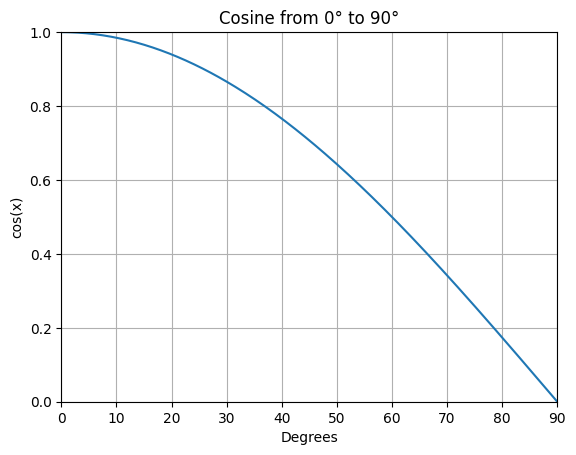

In [51]:
import numpy as np
import scipy
from scipy.spatial.distance import cosine

import numpy as np
import matplotlib.pyplot as plt

# Data
x_deg = np.linspace(0, 90, 300)
x_rad = np.deg2rad(x_deg)
y = np.cos(x_rad)

# Plot
plt.figure()
plt.plot(x_deg, y)
plt.xlabel("Degrees")
plt.ylabel("cos(x)")
plt.title("Cosine from 0° to 90°")
plt.xlim(0, 90)
plt.ylim(0, 1)
plt.grid(True)

plt.show()


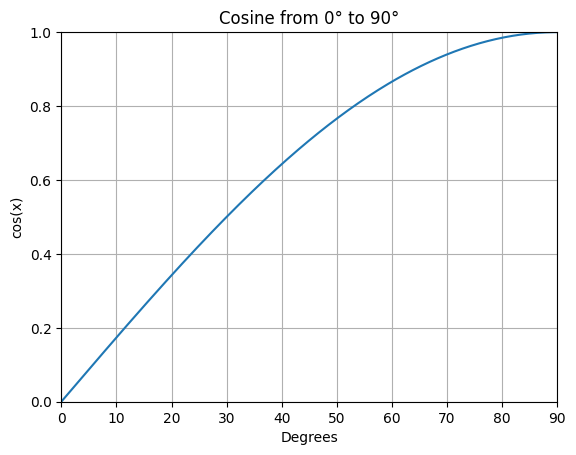

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x_deg = np.linspace(0, 90, 300)
x_rad = np.deg2rad(x_deg)
y = np.sin(x_rad)

# Plot
plt.figure()
plt.plot(x_deg, y)
plt.xlabel("Degrees")
plt.ylabel("cos(x)")
plt.title("Cosine from 0° to 90°")
plt.xlim(0, 90)
plt.ylim(0, 1)
plt.grid(True)

plt.show()


In [54]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [55]:
cosine_similarity([[1, 0, 0]], [[0, 1, 0]])

array([[0.]])

In [68]:
cosine_similarity([[6, 2]], [[3, 1]])

array([[1.]])

In [ ]:
### distance of similar vector is nearly zero
cosine_distances([[6, 2]], [[3, 1]])

array([[1.11022302e-16]])

In [60]:
### distance of orthogonal vectors is 1 where two vectors are at 90 degrees
cosine_distances([[1, 0, 0]], [[0, 1, 0]])

array([[1.]])

In [63]:
import pandas as pd
df_pt = pd.read_csv("../data/potential-talents.csv")

In [77]:
df = pd.DataFrame([
    {'iphone':3, 'galaxy':1},
    {'iphone':2, 'galaxy':2},   
    {'iphone':1, 'galaxy':3},
    {'iphone':0, 'galaxy':0},
    {'iphone':2, 'galaxy':0}
],
index =['doc1', 'doc2', 'doc3', 'doc4', 'doc5']
)

In [78]:
df

,iphone,galaxy
doc1,3,1
doc2,2,2
doc3,1,3
doc4,0,0
doc5,2,0


In [66]:
df.loc['doc1':'doc1']

,iphone,galaxy
doc1,3,1


In [75]:
cosine_similarity(df.loc['doc1':'doc1'], df.loc['doc4':'doc4'])


array([[0.]])

In [76]:
cosine_similarity(df.loc['doc2':'doc2'], df.loc['doc3':'doc3'])


array([[0.89442719]])

In [79]:
cosine_similarity(df.loc['doc1':'doc1'], df.loc['doc5':'doc5'])

array([[0.9486833]])

In [80]:
cosine_distances(df.loc['doc1':'doc1'], df.loc['doc5':'doc5'])

array([[0.0513167]])

In [81]:
cosine_distances(df.loc['doc1':'doc1'], df.loc['doc5':'doc5']) + cosine_similarity(df.loc['doc1':'doc1'], df.loc['doc5':'doc5'])

array([[1.]])

In [82]:
cosine_similarity(df.loc['doc1':'doc1'], df.loc['doc1':'doc1'])

array([[1.]])

In [83]:
cosine_distances(df.loc['doc1':'doc1'], df.loc['doc1':'doc1'])

array([[1.11022302e-16]])